In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [80]:
heart_disease = pd.read_excel('Processed_Cleveland.xlsx')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [81]:
# Define the features and the outcome
X = heart_disease.iloc[:, :13]
y = heart_disease.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [82]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Linkages

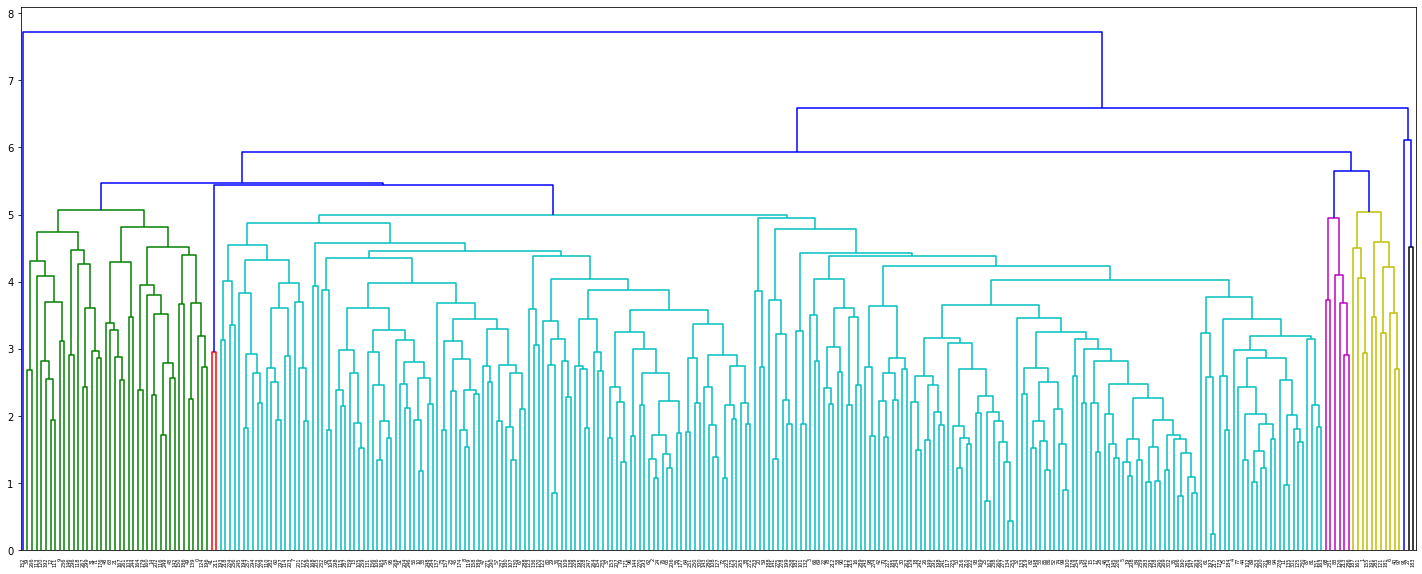

In [83]:
# Average Linkage
plt.figure(figsize=(25,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

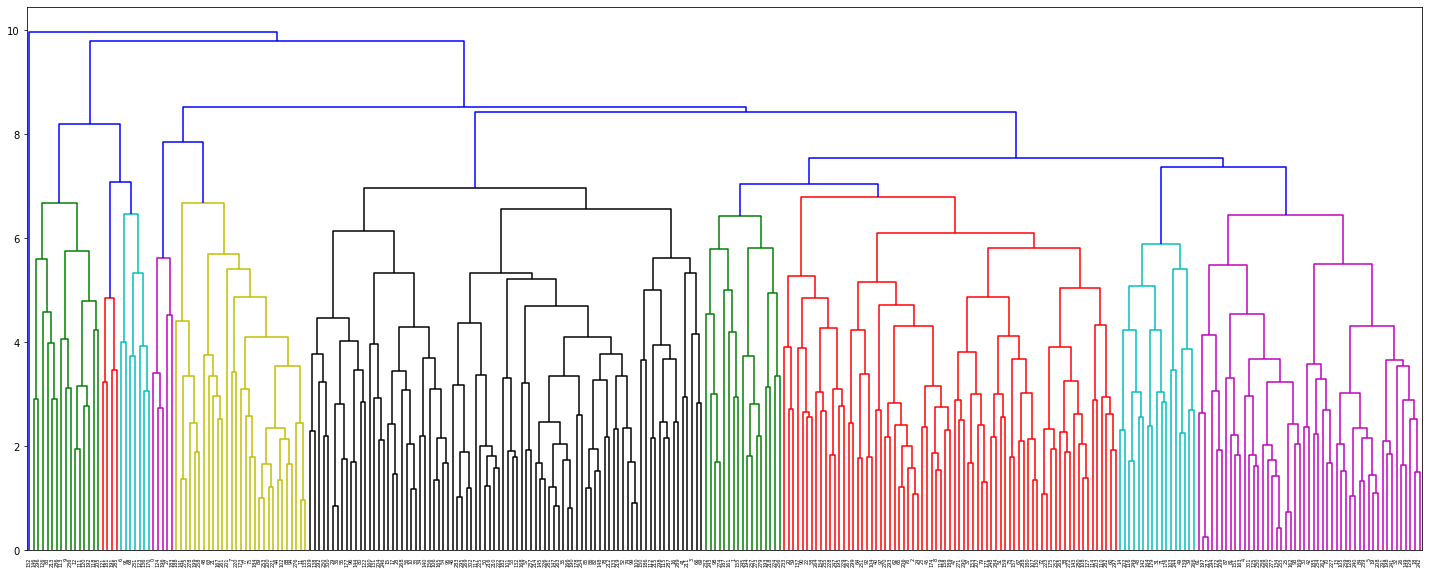

In [84]:
# Complete Linkage
plt.figure(figsize=(25,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

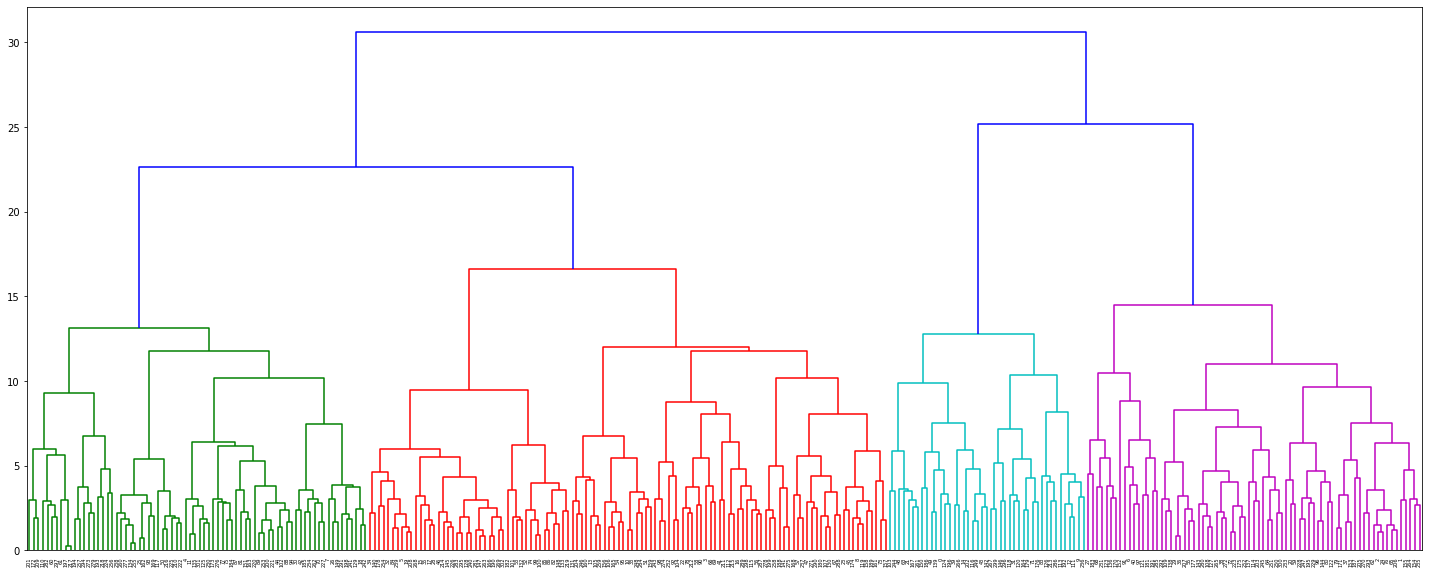

In [85]:
# Ward Linkage
plt.figure(figsize=(25,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

The ward linkage seems to be the best linkage, but anyway, we'll check the metrics below.

# ARI & Silhouette Scores

Recall that for 2 clusters in the previous lesson we had;


*    ARI score:
  0.7453081340344547
*   Silhouette Score:
  0.1757847117726187


**For complete linkage**

In [113]:
# Yığınsal Kümelemenin Tanımlanması
agg_küme = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Modeli Fit Etmek
kümeler = agg_küme.fit_predict(X_std)

In [114]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='cosine')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.21394030618551016
The silhoutte score of the Agglomerative Clustering solution: 0.1900255356793155


ARI score is lower, whereas silhouette score is greater now.

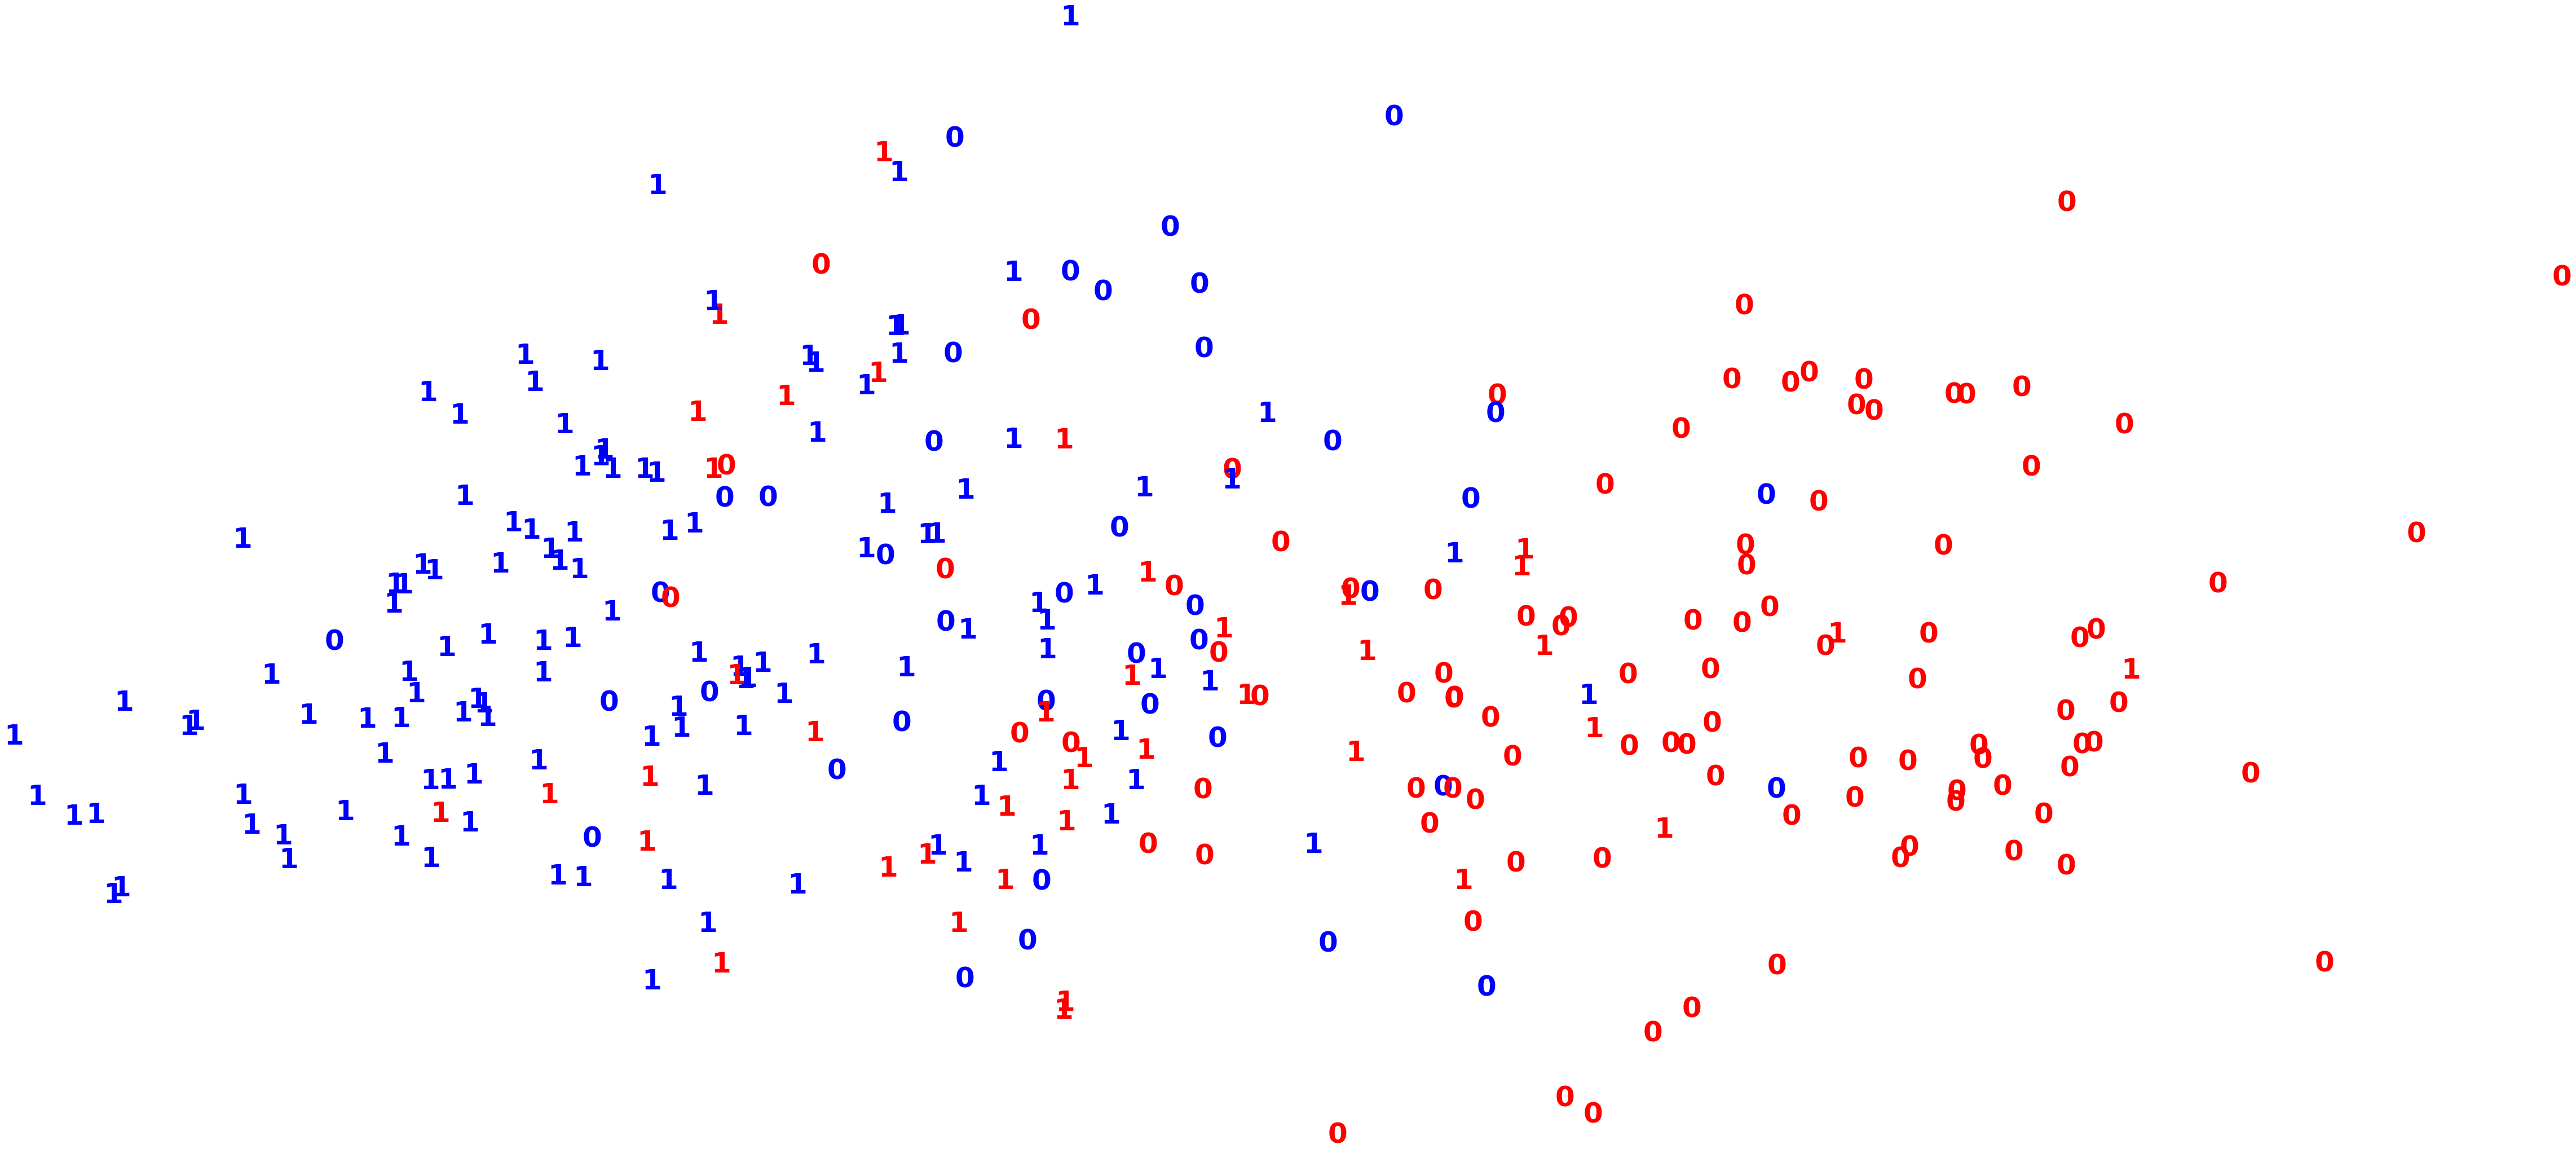

In [91]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(kümeler[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


**For average linkage**

In [115]:
# Yığınsal Kümelemenin Tanımlanması
agg_küme = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=2)

# Modeli Fit Etmek
kümeler = agg_küme.fit_predict(X_std)

In [116]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='cosine')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.29404901333534655
The silhoutte score of the Agglomerative Clustering solution: 0.23325509557943136


ARI score is lower, whereas silhouette score is greater now.
Also, this looks like the best linkage method among 3.

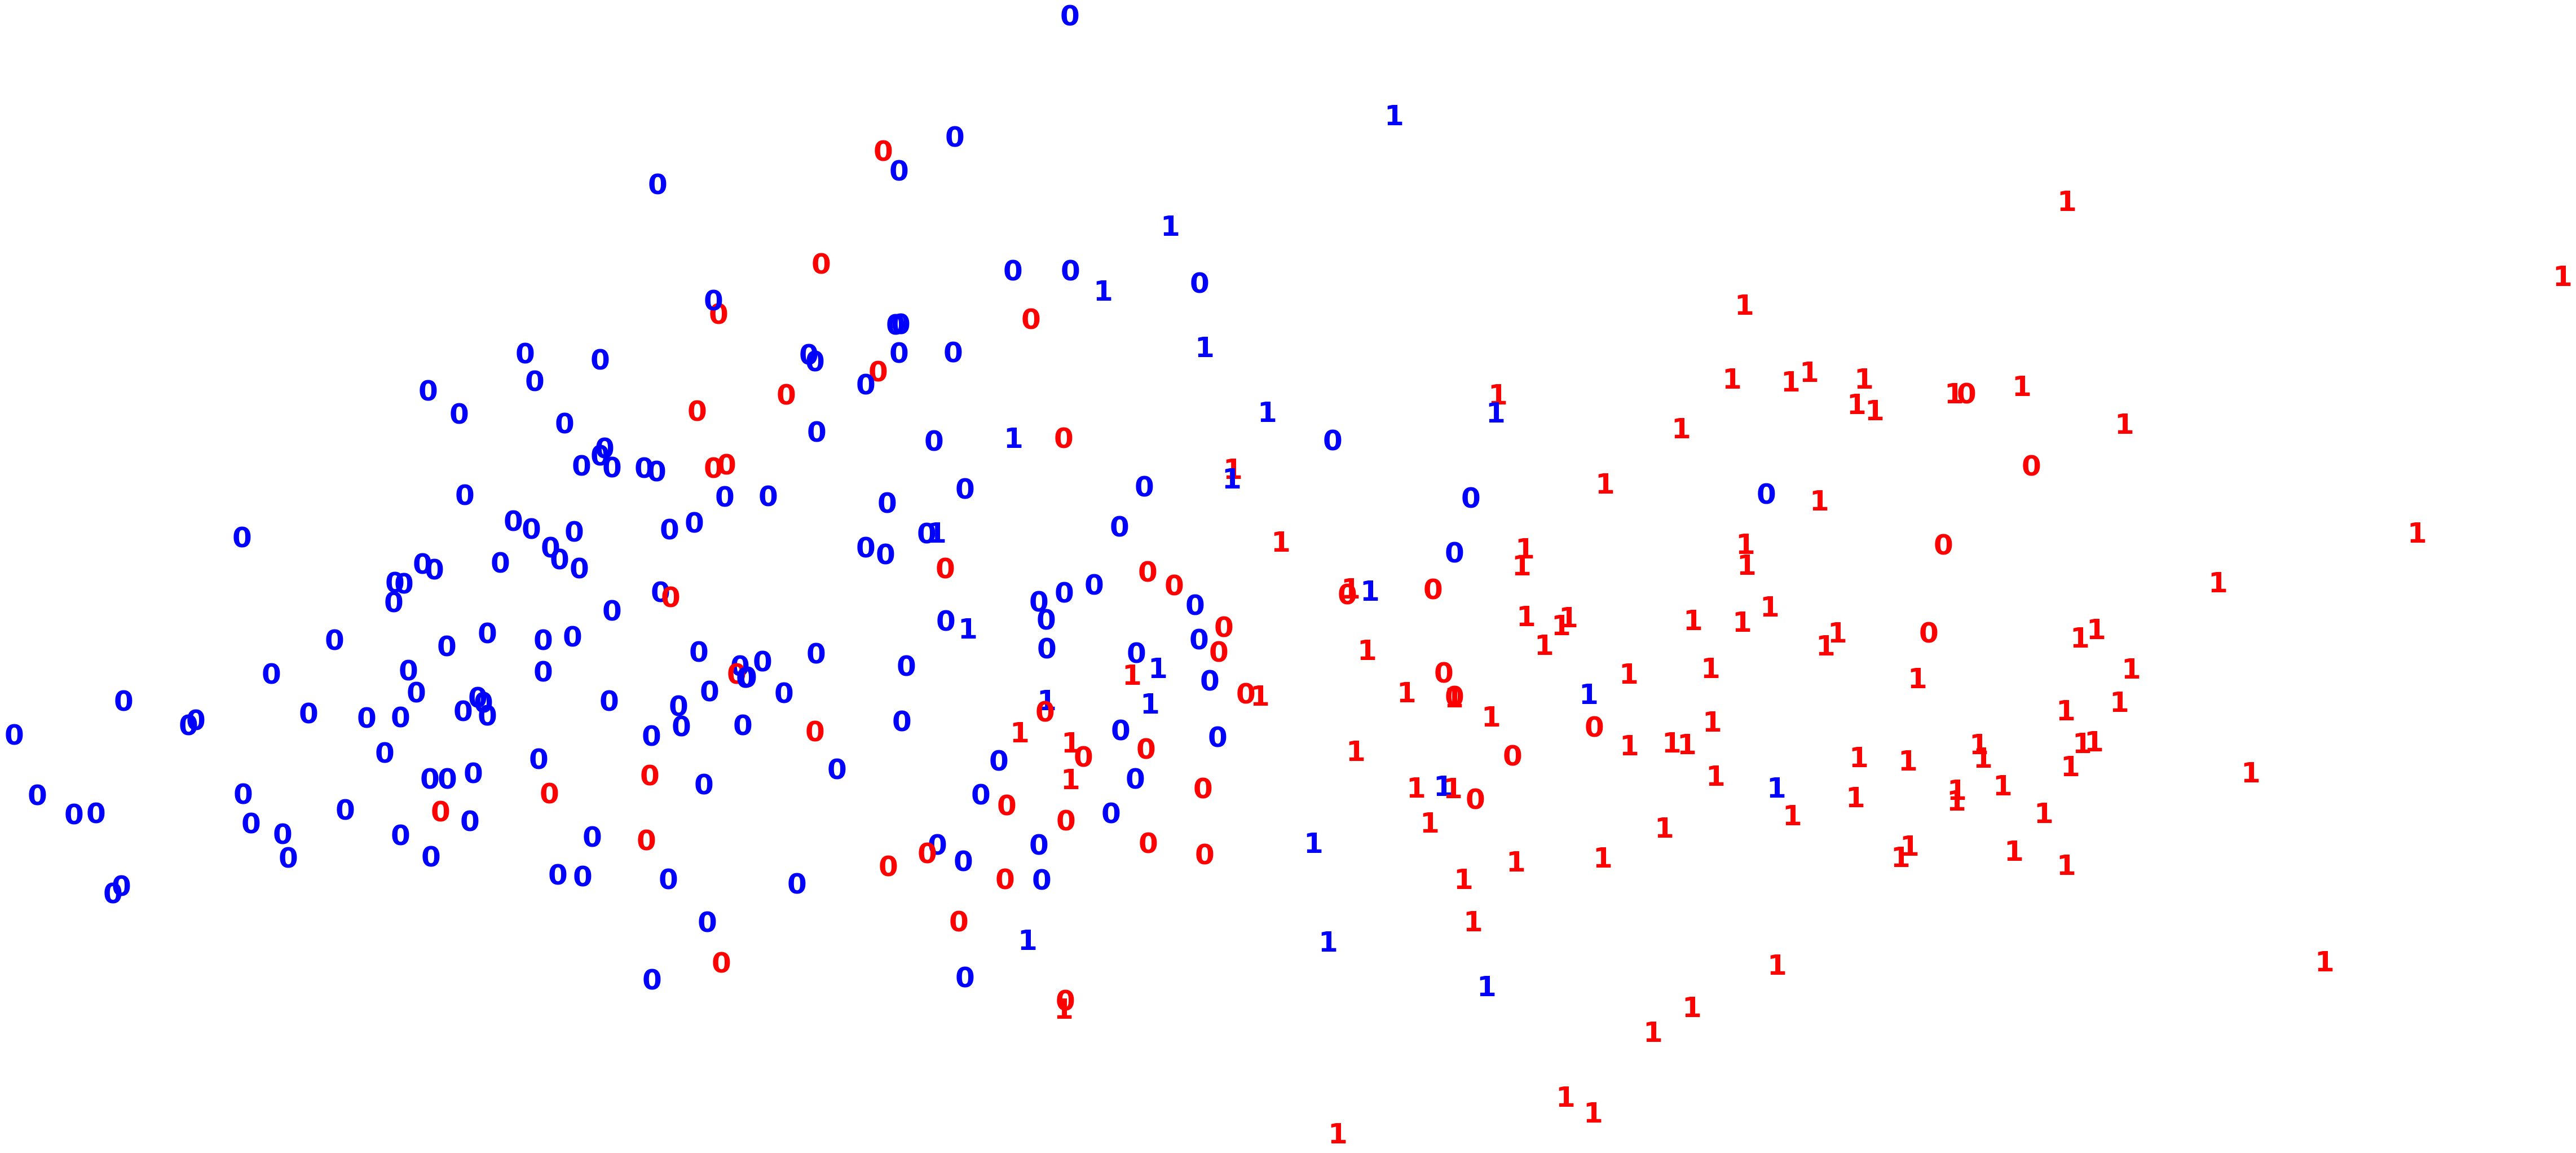

In [103]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(kümeler[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


**For ward linkage**

In [117]:
# Yığınsal Kümelemenin Tanımlanması
agg_küme = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Modeli Fit Etmek
kümeler = agg_küme.fit_predict(X_std)

In [118]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.146129913123814
The silhoutte score of the Agglomerative Clustering solution: 0.1387197366557222


Both scores are lesser now.

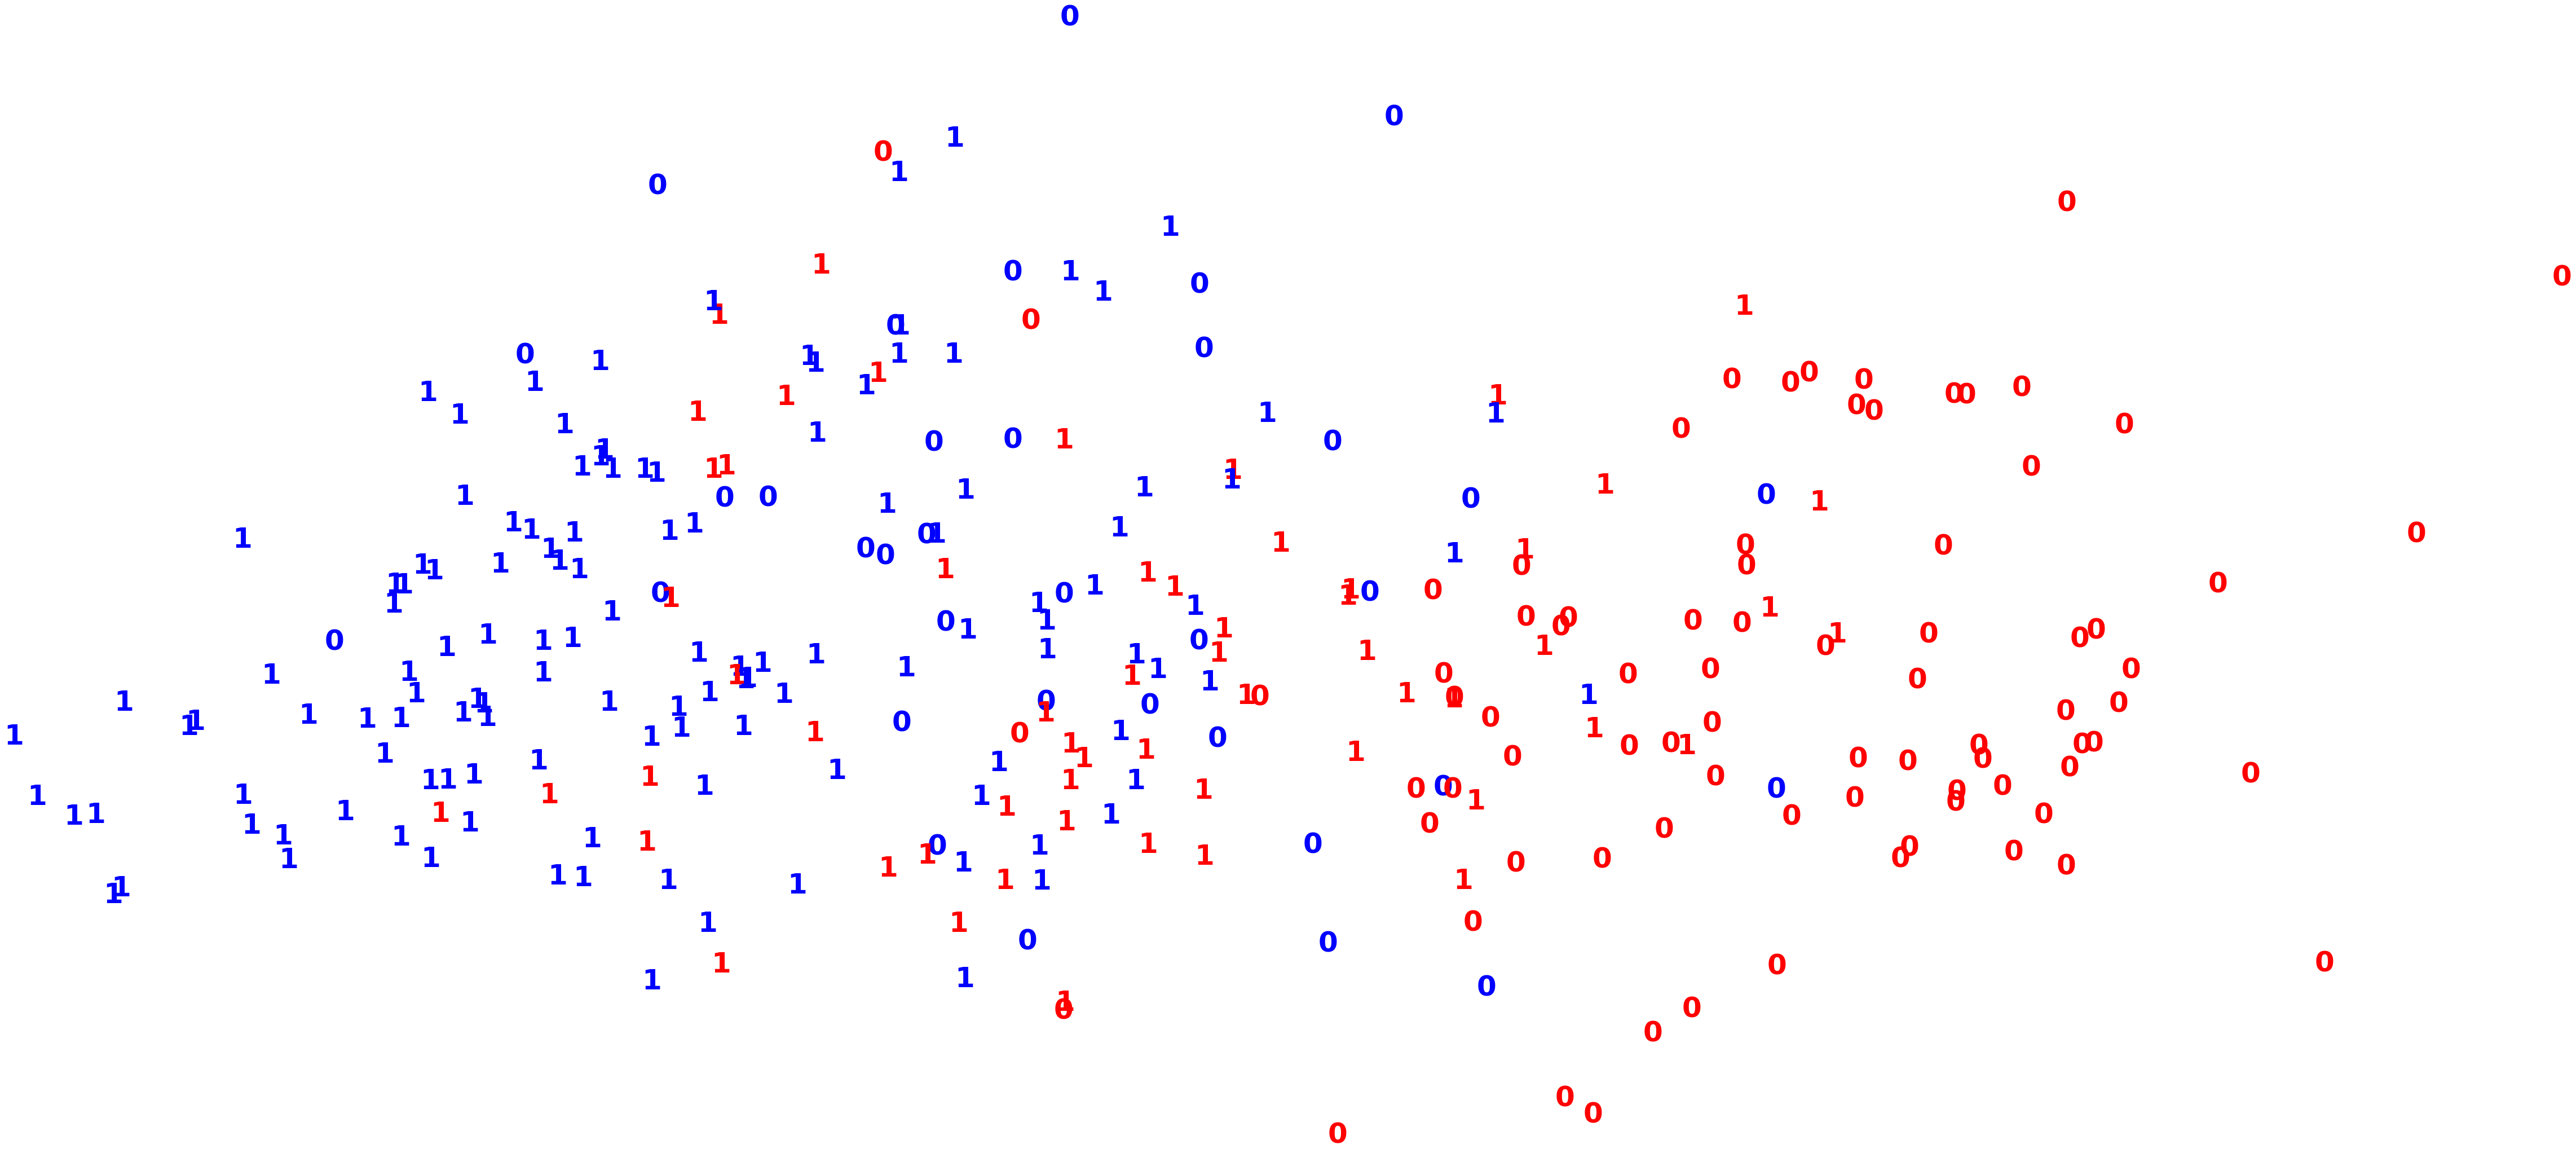

In [107]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(kümeler[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


# Conclusion

The metrics are telling us that the average linkage is the best among all 3.
However, its ARI score is pretty bad still, but its silhouette score is greater than K-means.